In [ ]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Quick note on "backends" and Jupyter notebooks

Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at.  This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice (Qt, Tk, Wx, etc).

To check what backend Matplotlib is currently using:

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

2.2.3
module://ipykernel.pylab.backend_inline


If you are working interactively at an (I)python prompt, the GUI framework is not critical (mostly aesthetic) however when working in Jupyter we need to pick a backend that integrates with Jupyter (javascript) framework.

To select the backend use ``matplotlib.use("backend_name")``, for example, ``'nbagg'``


which must be done *before* you `import matplotlib.pyplot as plt`.

You can also set the backend via an 'ipython magic' ``%matplotlib backend_name``.  In addition to setting the backend, the magic also calls `plt.ion()`, which puts Matplotlib in 'interacitve mode' (the inverse is `plt.ioff()`).  In 'interactive mode' figures are shown (injected into the web page in the notebook) as soon as they are created.  Otherwise, figures are not shown until you explicitly call `plt.show()`.


In these tutorials we will mostly work in non-interactive mode for better control of when
figures are shown in the notebooks.
This also better mimics the behavior you can expect in regular python scripts.


# Getting Started with pyplot

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We are going to use numpy to define some data, then make a simple line plot.

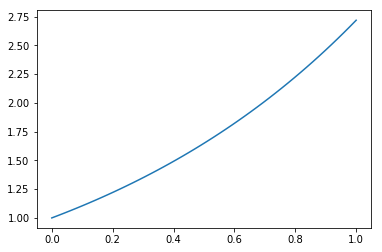

In [3]:
x = np.linspace(0, 1)
y = np.exp(x)
plt.plot(x, y)
#plt.show()

By default, matplotlib uses a line, but you can specify the linestyle, color, and marker using a third string argument, called the `fmt` string. (More on other ways to control the line & marker styles later.)

Text(0,0.5,'exp(x)')

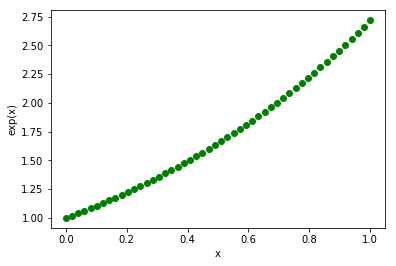

In [11]:
plt.plot(x, y, 'og')
plt.xlabel("x")
plt.ylabel("exp(x)")

<BarContainer object of 3 artists>

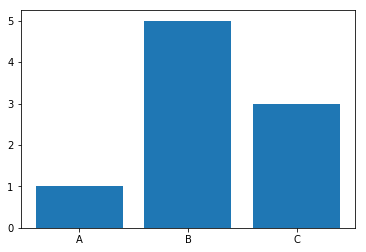

In [21]:
plt.bar(["A", "B", "C"], [1, 5, 3])

### Exercise 
Use help() on the plt.plot or plt.bar function to see what other options are available. Choose at least one of the following exercises: 
  1. Make a new line plot with a different color or linestyle than the one above.
  2. Make a new bar plot with a different width or alignment than the one above.

## Figures

Control the size, shape, and background color (and more!) of the figure.

Text(0,0.5,'exp(x)')

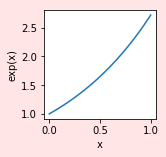

In [16]:
fig = plt.figure(facecolor=(1, 0, 0, .1), figsize=(2, 2))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("exp(x)")

Note: the figure extends a little beyond the axes.

``facecolor``: can be defined in several ways -- in this case, an RGBA tuple. (More on colors later.)

``figsize``: expects a tuple of ``(width, height)`` in inches -- Great for journal submissions!

Use [`figaspect`](https://matplotlib.org/api/_as_gen/matplotlib.figure.figaspect.html?highlight=figaspect#matplotlib.figure.figaspect) to specify the aspect ratio instead of a specific size.

Text(0.5,1,'abcd')

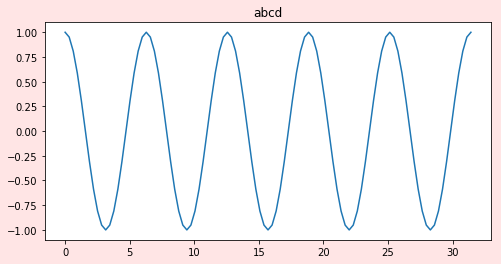

In [33]:
fig = plt.figure(figsize=plt.figaspect(.5), facecolor=(1, 0, 0, .1))
plt.plot(x, y)

If you don't use the figure object (as we did above) then a default figure is automatically created.

### Exercise:
Make a plot of a sin or cos with several wavelengths. Change the figure size or aspect ratio of the figure. If you have time, try the following:

  - Add labels to x and y.
  - Add a title `plt.title`.
  - Add a second line to the plot. What is the default style and color?
  - Change the color, line style, and/or marker style of the second line using the fmt string.

You may want to use: `from math import pi`

# Axes: more control of your plot

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) object. An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object - even if you don't realize it.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

The easiest way of adding an axes object is to use the subplot function which returns an axes object.

`add_subplot` accepts a string of three integers (e.g. `111` below), representing the number of rows, columns, and total subplots.

[(-2, 8),
 Text(0,0.5,'Y-Axis'),
 (0.5, 4.5),
 Text(0.5,0,'X-Axis'),
 Text(0.5,1,'An Example Axes')]

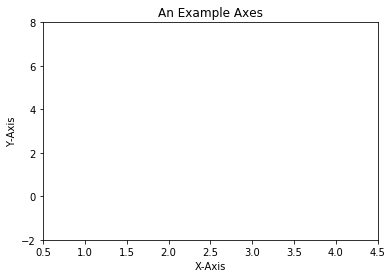

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

Text(0.5,0,'X-Axis (changed)')

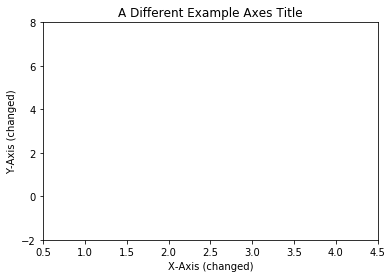

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

# Using axes objects

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

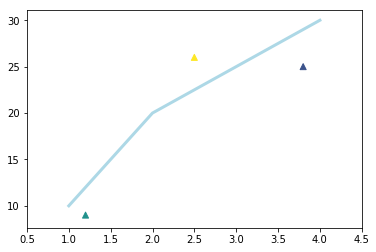

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

(0.5, 4.5)

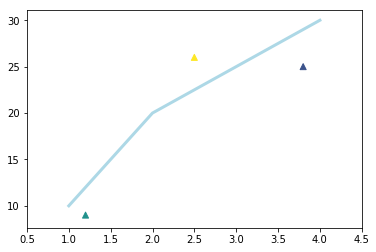

In [35]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

## Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

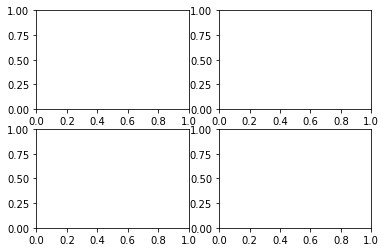

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2)

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

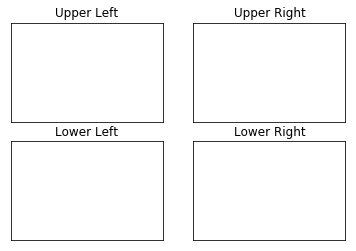

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

### Exercise

Can you reproduce this figure? Feel free to play with colors, markers, and axis labels.

<img src="images/exercise_1-1.png">

Get started by generating the data as below:

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)

# Subplot names:
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?

['Signal 1', 'Signal 2', 'Signal 3']


---------------

One possible answer below

------------


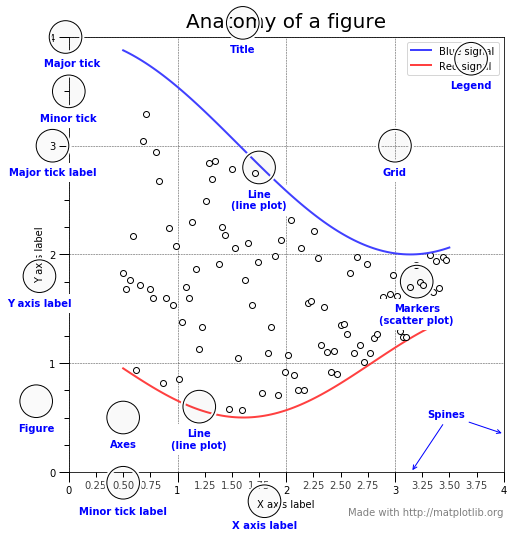

In [70]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.savefig("images/anatomy.png")

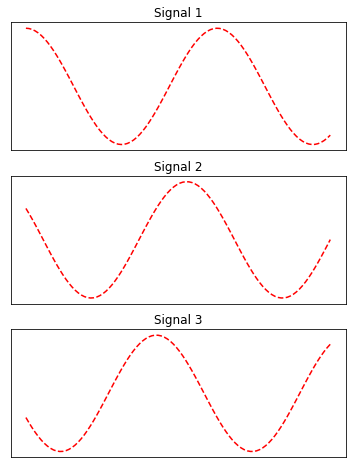

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))
axes[0].plot(x, y1, '--r')
axes[1].plot(x, y2, '--r')
axes[2].plot(x, y3, '--r')
for i, ax in enumerate(axes.flat):
    # Remove all xticks and yticks
    ax.set(xticks=[], yticks=[])
    # Set the title
    ax.set_title(names[i])